Found 28709 images belonging to 7 classes.
898/898 [==============================] - 406s 450ms/step


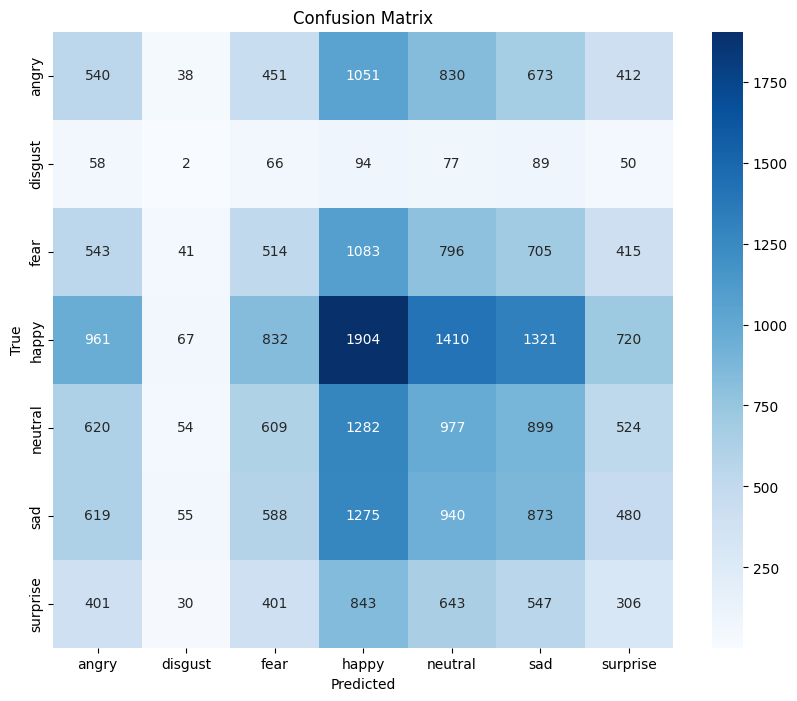

              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3995
     disgust       0.01      0.00      0.01       436
        fear       0.15      0.13      0.14      4097
       happy       0.25      0.26      0.26      7215
     neutral       0.17      0.20      0.18      4965
         sad       0.17      0.18      0.18      4830
    surprise       0.11      0.10      0.10      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.18      0.18      0.18     28709



In [6]:
import numpy as np
import os
import pathlib
import ipykernel

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definir tamaño de las imágenes
img_width, img_height = 299, 299
batch_size = 32

# Obtener la ruta actual del notebook
notebook_path = pathlib.Path(ipykernel.get_connection_file()).parent.resolve()
folder_path = 'datasetv2'

# Preparar los generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(folder_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

# Cargar el modelo entrenado
model = load_model('model_maxv2.h5')

# Hacer predicciones
train_generator.reset()
predictions = model.predict(train_generator, steps=train_generator.n // batch_size + 1, verbose=1)

# Convertir las predicciones en etiquetas
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales
true_classes = train_generator.classes

# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Generar el reporte de clasificación
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()))

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(train_generator.class_indices.keys()), yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Mostrar el reporte de clasificación
print(report)